### Import libraries

In [26]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import os

### Import data

In [27]:
path = '/Users/bobbi/Careerfoundry/Shipping_project/02 Data/Original Data'

world_trade_2015 = pd.read_csv(os.path.join(path, 'world_trade_2015.csv'), index_col = False, encoding="latin-1")
world_trade_2016 = pd.read_csv(os.path.join(path, 'world_trade_2016.csv'), index_col = False, encoding="latin-1")
world_trade_2017 = pd.read_csv(os.path.join(path, 'world_trade_2017.csv'), index_col = False, encoding="latin-1")
world_trade_2018 = pd.read_csv(os.path.join(path, 'world_trade_2018.csv'), index_col = False, encoding="latin-1")
world_trade_2019 = pd.read_csv(os.path.join(path, 'world_trade_2019.csv'), index_col = False, encoding="latin-1")
world_trade_2020 = pd.read_csv(os.path.join(path, 'world_trade_2020.csv'), index_col = False, encoding="latin-1")
world_trade_2021 = pd.read_csv(os.path.join(path, 'world_trade_2021.csv'), index_col = False, encoding="latin-1")
world_trade_2022 = pd.read_csv(os.path.join(path, 'world_trade_2022.csv'), index_col = False, encoding="latin-1")
world_trade_2023 = pd.read_csv(os.path.join(path, 'world_trade_2023.csv'), index_col = False, encoding="latin-1")
world_trade_2024 = pd.read_csv(os.path.join(path, 'world_trade_2024.csv'), index_col = False, encoding="latin-1")


In [28]:
world_trade_2015.shape

(933, 47)

In [29]:
# Create a list to concatenate files
dfs = [
    world_trade_2015,
    world_trade_2016,
    world_trade_2017,
    world_trade_2018,
    world_trade_2019,
    world_trade_2020,
    world_trade_2021,
    world_trade_2022,
    world_trade_2023,
    world_trade_2024
]

In [30]:
# Concatenate into one DataFrame
world_trade_combined = pd.concat(dfs, ignore_index=True)


In [31]:
world_trade_combined.shape

(12679, 47)

In [32]:
world_trade_combined.head()

,typeCode,freqCode,refPeriodId,refYear,refMonth,period,reporterCode,reporterISO,reporterDesc,flowCode,...,netWgt,isNetWgtEstimated,grossWgt,isGrossWgtEstimated,cifvalue,fobvalue,primaryValue,legacyEstimationFlag,isReported,isAggregate
0,C,M,20150101,2015,1,201501,24,AGO,Angola,M,...,0.0,False,0,False,6.304750e+04,5.392650e+04,6.304750e+04,0,False,True
1,C,M,20150101,2015,1,201501,76,BRA,Brazil,M,...,0.0,False,0,False,4.721910e+05,4.170910e+05,4.721910e+05,0,False,True
2,C,M,20150101,2015,1,201501,76,BRA,Brazil,X,...,0.0,False,0,False,NaN,6.859409e+07,6.859409e+07,0,False,True
3,C,M,20150101,2015,1,201501,24,AGO,Angola,M,...,0.0,True,0,False,2.151730e+09,1.972705e+09,2.151730e+09,4,False,True
4,C,M,20150101,2015,1,201501,24,AGO,Angola,X,...,0.0,True,0,False,0.000000e+00,2.664724e+09,2.664724e+09,4,False,True


#### Examine and clean data

The dataset contains the following columns:
* **typeCode** – Numeric code for the data type (internal to UN Comtrade).
* **freqCode** – Frequency of the data (annual = A, monthly = M) stored as a numeric code.
* **refPeriodId** – Internal numeric reference to the period (e.g., year-month).
* **refYear** – The reference year of the transaction (e.g., 2020).
* **refMonth** – The reference month (1–12); for annual data, often set to 0 or missing.
* **period** – Another period identifier (e.g., 202001 for January 2020).
* **reporterCode** – Numeric code for the reporting country/area.
* **reporterISO** – ISO code (e.g., "USA", "CHN") of the reporting country.
* **reporterDesc** – Textual name of the reporting country (e.g., “United States of America”).
* **flowCode** – Numeric code for the direction of trade (e.g., 1 = Import, 2 = Export).
* **flowDesc** – Text description of the trade flow (“Import”, “Export”).

This analysis will focus on global trade so no specific trade partner will be used
* **partnerCode** – Numeric code for the partner country/area.
* **partnerISO** – ISO code of the partner country (e.g., “MEX”).
* **partnerDesc** – Full textual name of the partner country (e.g., “Mexico”).
* **partner2Code, partner2ISO, partner2Desc** – Secondary or “third country” partner fields, often zero/blank unless re-exports are included.

This analysis focuses on all commodities
* **classificationCode, classificationSearchCode** – Indicates the commodity classification (e.g., HS 2017), with search codes used internally.
* **isOriginalClassification** – Flag showing if this record uses its original classification or a converted one.
* **cmdCode** – The commodity code under the chosen classification (e.g., HS code 1001).
* **cmdDesc** – Text description of the commodity (e.g., “Wheat and meslin”).
* **isLeaf** – Flag indicating if the commodity code is a leaf (most detailed) in the classification hierarchy.
* **customsCode, customsDesc**  – Separate customs procedure code and description (not always used).

This dataset looks at all means of transport to get total trade value
* **motCode, motDesc** – Mode of transport code and its description (e.g., sea, rail, road).

Data related to quantity and weight is empty so it won't be used
* **qtyUnitCode, qtyUnitAbbr** – The unit of quantity (e.g., kilograms, liters) code and its abbreviation.
* **isQtyEstimated** – Flag indicating if the quantity was estimated rather than reported.
* **altQtyUnitCode, isAltQtyEstimated** – Alternate quantity unit and a flag indicating if that alternate quantity was also estimated.
* **isNetWgtEstimated, isGrossWgtEstimated** – Flags indicating whether net or gross weight was estimated.
* **cifvalue** – Import value under “Cost, Insurance, and Freight” terms, usually in USD.
* **fobvalue** – Export “Free on Board” value, typically reported by exporters (USD).
* **primaryValue** – Main trade value field (usually USD); may be CIF (imports) or FOB (exports).
* **legacyEstimationFlag** – Flag indicating if this data source is legacy or estimated.
* **isReported** – Flag indicating if data came directly from the reporting country or is mirror/estimate.
* **isAggregate** – Flag indicating if this record is aggregated from multiple lines instead of a single commodity.

Some of them are not needed for the analysis so I am going to drop those columns.

In [33]:
clean_world_trade = world_trade_combined.drop(columns = ['typeCode', 'freqCode', 'aggrLevel', 'mosCode', 'qty', 'altQtyUnitAbbr', 'altQty', 'netWgt', 'grossWgt', 'motCode', 'customsCode', 'customsDesc', 'refYear', 'refMonth', 'reporterCode', 'reporterISO', 'partnerCode', 'partnerISO', 'partner2Code', 'partner2ISO', 'cmdCode', 'qtyUnitCode', 'isQtyEstimated', 'altQtyUnitCode', 'isAltQtyEstimated',
'isNetWgtEstimated', 'isGrossWgtEstimated', 'isReported', 'isAggregate', 'isLeaf', 'qtyUnitAbbr','partner2Desc', 'partnerDesc', 'classificationSearchCode', 'classificationCode', 'isOriginalClassification', 'cmdDesc', 'legacyEstimationFlag'])

In [34]:
clean_world_trade.head(30)

,refPeriodId,period,reporterDesc,flowCode,flowDesc,motDesc,cifvalue,fobvalue,primaryValue
0,20150101,201501,Angola,M,Import,Water,6.304750e+04,5.392650e+04,6.304750e+04
1,20150101,201501,Brazil,M,Import,Water,4.721910e+05,4.170910e+05,4.721910e+05
2,20150101,201501,Brazil,X,Export,Water,NaN,6.859409e+07,6.859409e+07
3,20150101,201501,Angola,M,Import,Sea,2.151730e+09,1.972705e+09,2.151730e+09
4,20150101,201501,Angola,X,Export,Sea,0.000000e+00,2.664724e+09,2.664724e+09
5,20150101,201501,Brazil,M,Import,Sea,1.282436e+10,1.226344e+10,1.282436e+10
6,20150101,201501,Brazil,X,Export,Sea,NaN,1.131869e+10,1.131869e+10
7,20150101,201501,Brunei Darussalam,M,Import,Sea,3.219412e+08,0.000000e+00,3.219412e+08
8,20150101,201501,Brunei Darussalam,X,Export,Sea,0.000000e+00,7.031158e+08,7.031158e+08
9,20150101,201501,Myanmar,M,Import,Sea,1.103654e+09,0.000000e+00,1.103654e+09


Now some columns would be renamed for legibility 

In [35]:
# Change name of country colum
clean_world_trade.rename(columns={"reporterDesc": "country"}, inplace=True)

In [36]:
# Change name of period colum
clean_world_trade.rename(columns={"refPeriodId": "date"}, inplace=True)

In [37]:
clean_world_trade['date'].dtypes

dtype('int64')

In [38]:
# Convert the integer column to a string
clean_world_trade['date'] = clean_world_trade['date'].astype(str)

# Parse the string as a datetime object
clean_world_trade['date'] = pd.to_datetime(clean_world_trade['date'], format='%Y%m%d', errors='coerce')

# Step 3: Verify the conversion
clean_world_trade['date'].dtypes
clean_world_trade['date'].head()

0   2015-01-01
1   2015-01-01
2   2015-01-01
3   2015-01-01
4   2015-01-01
Name: date, dtype: datetime64[ns]

In [39]:
clean_world_trade.drop(columns = ['period'], inplace = True)

In [40]:
clean_world_trade.head()

,date,country,flowCode,flowDesc,motDesc,cifvalue,fobvalue,primaryValue
0,2015-01-01,Angola,M,Import,Water,6.304750e+04,5.392650e+04,6.304750e+04
1,2015-01-01,Brazil,M,Import,Water,4.721910e+05,4.170910e+05,4.721910e+05
2,2015-01-01,Brazil,X,Export,Water,NaN,6.859409e+07,6.859409e+07
3,2015-01-01,Angola,M,Import,Sea,2.151730e+09,1.972705e+09,2.151730e+09
4,2015-01-01,Angola,X,Export,Sea,0.000000e+00,2.664724e+09,2.664724e+09


In [41]:
# Check for missing values in each column
missing_values = clean_world_trade.isnull().sum()
print("Missing values per column:")
print(missing_values)

Missing values per column:
date               0
country            0
flowCode           0
flowDesc           0
motDesc            0
cifvalue        2961
fobvalue        1992
primaryValue       0
dtype: int64


In [42]:
# Check if missing values are concentrated in specific countries
missing_by_country = clean_world_trade[clean_world_trade['cifvalue'].isnull()]['country'].value_counts()
print("Missing cifvalue by country:")
print(missing_by_country)

# Check if missing values are concentrated in specific years
clean_world_trade['year'] = clean_world_trade['date'].dt.year
missing_by_year = clean_world_trade[clean_world_trade['cifvalue'].isnull()]['year'].value_counts()
print("\nMissing cifvalue by year:")
print(missing_by_year)

Missing cifvalue by country:
country
Brazil                   216
Canada                   120
Slovakia                 116
Madagascar               108
South Africa             106
Guyana                    95
Angola                    85
Dominican Rep.            85
Georgia                   85
Mozambique                84
Myanmar                   84
Cyprus                    84
Mexico                    78
Benin                     72
Thailand                  72
Uruguay                   72
Togo                      63
Namibia                   61
United Kingdom            60
Estonia                   58
Portugal                  56
Azerbaijan                53
Türkiye                   49
Antigua and Barbuda       49
Sweden                    47
Malta                     47
Latvia                    47
Rep. of Moldova           45
Ghana                     43
Bulgaria                  42
Burundi                   41
Colombia                  36
Seychelles                36
Kazakh

In [43]:
# Check if missing values are concentrated in specific countries
missing_by_country = clean_world_trade[clean_world_trade['fobvalue'].isnull()]['country'].value_counts()
print("Missing cifvalue by country:")
print(missing_by_country)

# Check if missing values are concentrated in specific years
clean_world_trade['year'] = clean_world_trade['date'].dt.year
missing_by_year = clean_world_trade[clean_world_trade['fobvalue'].isnull()]['year'].value_counts()
print("\nMissing cifvalue by year:")
print(missing_by_year)

Missing cifvalue by country:
country
Madagascar               96
Georgia                  85
Lesotho                  84
Cyprus                   84
Myanmar                  84
Benin                    72
Thailand                 72
Angola                   63
Togo                     63
Namibia                  61
United Kingdom           60
Estonia                  58
Portugal                 56
Azerbaijan               53
Malawi                   50
Antigua and Barbuda      49
Malta                    47
Latvia                   47
Sweden                   47
Rep. of Moldova          45
Ghana                    43
Burundi                  42
Bulgaria                 42
Seychelles               36
Kazakhstan               36
Malaysia                 36
Belize                   35
Slovenia                 34
Hungary                  34
China, Macao SAR         34
Bosnia Herzegovina       33
Montenegro               33
Germany                  32
Spain                    30
Greece     

In [44]:
clean_world_trade.describe()

,date,cifvalue,fobvalue,primaryValue,year
count,12679,9.718000e+03,1.068700e+04,1.267900e+04,12679.000000
mean,2019-11-02 02:53:18.801167104,1.728574e+09,2.474834e+09,3.000113e+09,2019.382522
min,2015-01-01 00:00:00,0.000000e+00,0.000000e+00,1.898000e+01,2015.000000
25%,2017-10-01 00:00:00,0.000000e+00,0.000000e+00,5.677151e+07,2017.000000
50%,2019-10-01 00:00:00,3.608793e+07,1.426260e+08,4.735810e+08,2019.000000
75%,2022-01-01 00:00:00,7.356960e+08,1.735760e+09,2.572819e+09,2022.000000
max,2024-12-01 00:00:00,3.376971e+10,3.617925e+10,3.617925e+10,2024.000000
std,NaN,4.344181e+09,5.148595e+09,5.511474e+09,2.593340


In [45]:
clean_world_trade[['cifvalue', 'fobvalue']].median()

cifvalue    3.608793e+07
fobvalue    1.426260e+08
dtype: float64

Missing Values:
* cifvalue: 2,984 missing values, concentrated in specific countries (e.g., Slovakia, Brazil, Madagascar) and years (e.g., 2024, 2022, 2023).
* fobvalue: 2,140 missing values, concentrated in specific countries (e.g., Madagascar, Cyprus, Lesotho) and years (e.g., 2024, 2022, 2023).

Data Distribution:
* The cifvalue and fobvalue columns have a wide range of values, with some very large outliers (e.g., fobvalue max is 3.077216e+13).
* The median values are much smaller than the means, indicating a right-skewed distribution:
   - cifvalue median: 3.608793e+07
   - fobvalue median: 1.426260e+08


In [46]:
# Rows with cifvalue and fobvalue missing
missing_both = clean_world_trade[clean_world_trade['cifvalue'].isnull() & clean_world_trade['fobvalue'].isnull()]
print(f"Number of rows where both cifvalue and fobvalue are missing: {len(missing_both)}")

Number of rows where both cifvalue and fobvalue are missing: 0


This makes sense as both CIF (Cost, Insurance, and Freight) value and FOB (Free on Board) value are key international trade terms that describe how the cost of goods is calculated during shipping. Important to know:
* Import transactions will usually have CIF values, since they represent the full cost to the importer.
* Export transactions will usually have FOB values, since they represent the price received by the exporter.
* If CIF and FOB values are missing, it might indicate incomplete trade records (e.g., missing cost details).

Now let's check the distribution of missing values in CIF and FOB. The missing values are due each of the values measuring different costs and therefore would be kept like this.

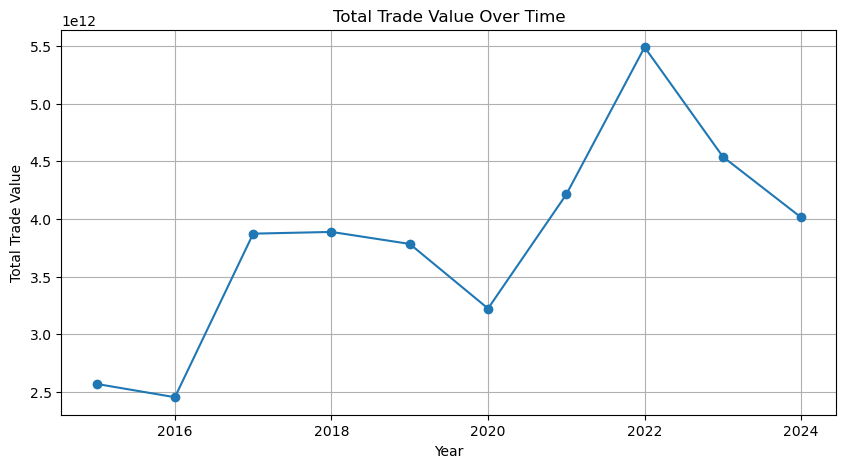

In [47]:
# Group by year and calculate total trade value
trade_by_year = clean_world_trade.groupby('year')['primaryValue'].sum()

plt.figure(figsize=(10, 5))
trade_by_year.plot(kind='line', marker='o')
plt.title('Total Trade Value Over Time')
plt.xlabel('Year')
plt.ylabel('Total Trade Value')
plt.grid()
plt.show()

There is clearly a peak in 2022 that should be checked in further analysis.

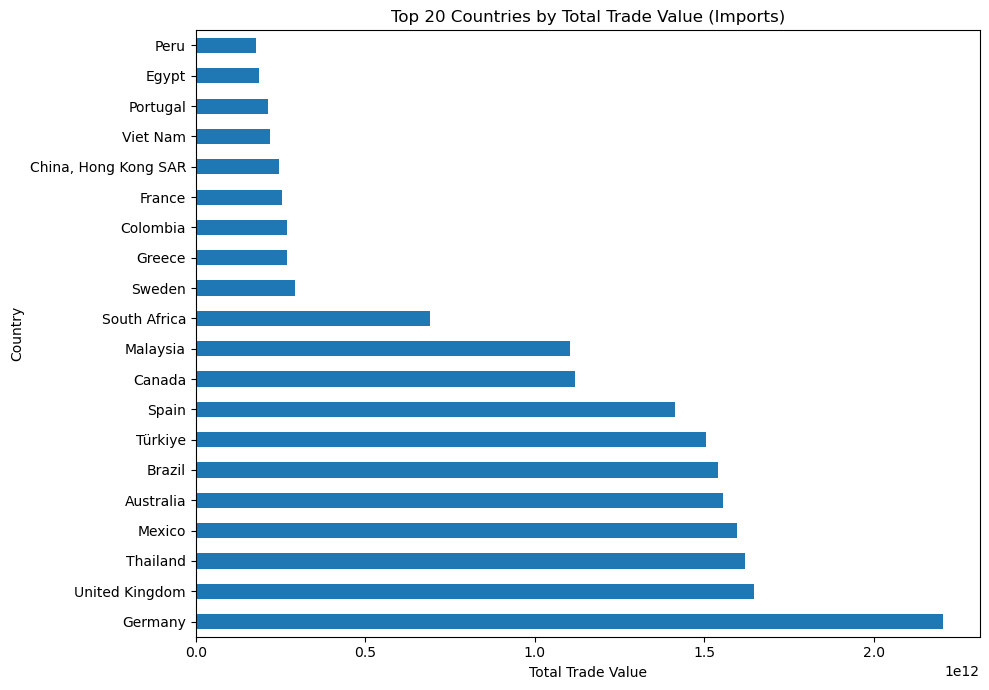

In [48]:
# Divide dataset
imports_df = clean_world_trade[clean_world_trade['flowCode'] == 'M']
exports_df = clean_world_trade[clean_world_trade['flowCode'] == 'X']

# Group by country and calculate total trade value
# Optionally, group by country and calculate total trade value for each dataset
imports_by_country = imports_df.groupby('country')['primaryValue'].sum().sort_values(ascending=False)
exports_by_country = exports_df.groupby('country')['primaryValue'].sum().sort_values(ascending=False)


top_20 = imports_by_country.head(20)
plt.figure(figsize=(10, 7))
top_20.plot.barh(title='Top 20 Countries by Total Trade Value (Imports)')
plt.xlabel('Total Trade Value')
plt.ylabel('Country')
plt.tight_layout()
plt.grid(False)
plt.show()

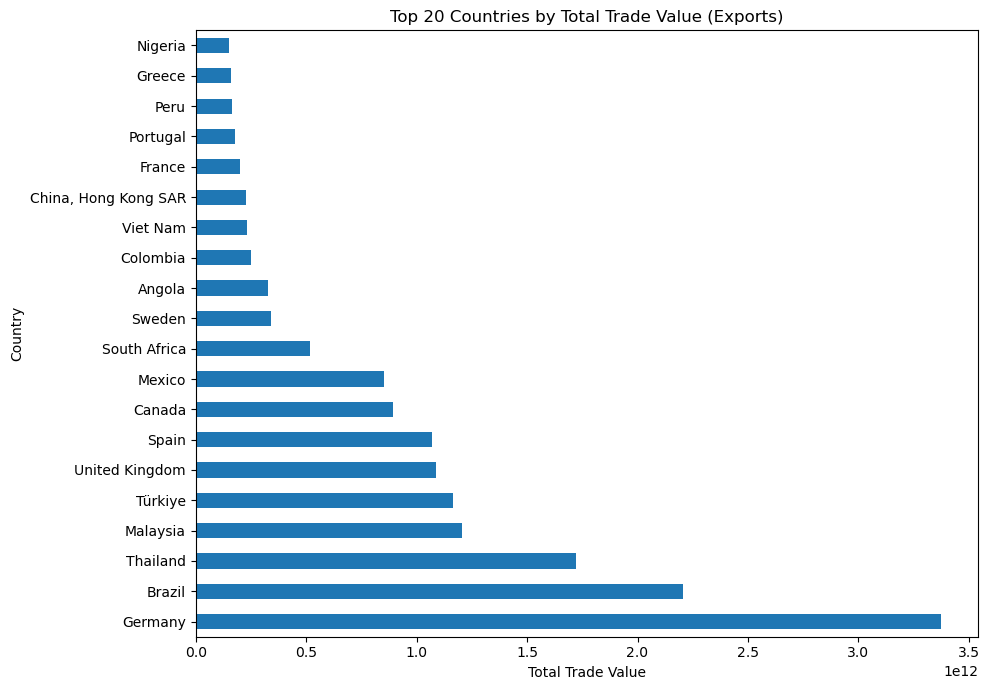

In [49]:
top_20 = exports_by_country.head(20)
plt.figure(figsize=(10, 7))
top_20.plot.barh(title='Top 20 Countries by Total Trade Value (Exports)')
plt.xlabel('Total Trade Value')
plt.ylabel('Country')
plt.tight_layout()
plt.grid(False)
plt.show()

In [50]:
clean_world_trade.to_pickle('/Users/bobbi/Careerfoundry/Shipping_project/02 Data/Prepared Data/world_trade.pkl')